In [646]:
from scipy.stats import binom
from pandas import DataFrame
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import special
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

Normal Distribution! 

A normal distribution is characterized by a bell shaped "gaussian" curve, giving the probability density based on a defined sigma and mean value. Gaussian distributions can be found anywhere from debunked 20th century sociaology to modern quantumn mechanics and everywhere in mathmatics.  

The range is usualy defined by the equation here:

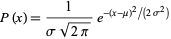

First we will define our constants! 

For a standard normal distribution our mean will be zero and standard deviation will be 1:

In [647]:
mew = 0
sigma = 1

Next, we will generate a normal distribution. and check our work by plotting it on a graph:

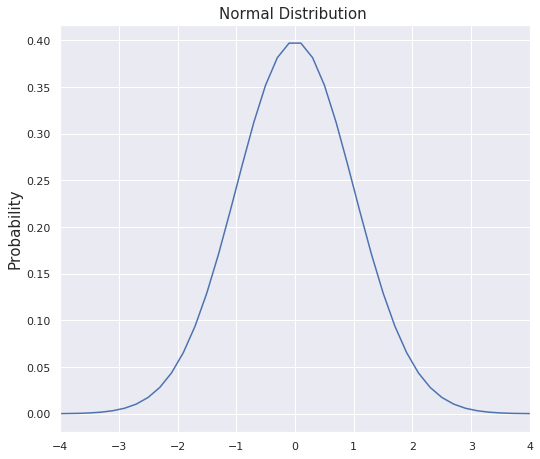

In [648]:
stats.norm(mew, sigma)
snd = stats.norm(mew, sigma)
x = np.linspace(-100, 100, 1000)
plt.figure(figsize=(7.5,7.5)) 
plt.plot(x, snd.pdf(x))
plt.xlim(-4, 4)
plt.title('Normal Distribution ', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()

That is a normal distribution!

Next we will use the cumulative distrabution function, and the variables we defined, to integrate from the left to a designated point. In this case that point is 1:

In [649]:
 
norm.cdf(1, mew, sigma)


0.8413447460685429

at X=1, our cdf function gave us 0.84134, which compared to the z tables with the same parameters is spot on!
Z table:  1.0|0.84134


Testing this out with other values of X:

In [650]:
norm.cdf(-1, mew, sigma)

0.15865525393145707

In [651]:
norm.cdf(0.9, mew, sigma)

0.8159398746532405

In [652]:
norm.cdf(-0.8, mew, sigma)

0.2118553985833967

In [653]:
norm.cdf(0.75, mew, sigma)


0.7733726476231317

In [654]:
norm.cdf(0.5, mew, sigma)

0.6914624612740131

Comparing the above results to the z table again, we find that they all match exactly. 

We can calculate in the opposite direction of .cdf() as well! We should be able to calculate a probability, given a specific sigma and a normal distrabution.

First by preforming a cdf and ppf in order we should get the same number we put in...

In [655]:
stats.norm.ppf(norm.cdf(0.5, mew, sigma))

0.5000000000000001

Bingo.

Now, calculating with raw probabilites:

In [656]:
stats.norm.ppf(0.8413447460685429) #this is the exact probability that occurs at the first standard deviation, so we should get 1

1.0

In [657]:
stats.norm.ppf(0.7733726476231317) # we calculated this probability previously and since the sigma was set to 1 we should get back the x value we put in (75)

0.7499999999999999

Inputing probabilites we calculated previously, we see that the correct assosiated 'sigma' values were returned. 








The standard exponential distribution! 

This distribution is characterized by an exponentialy increasing or decreasing proabability. notably, this distrabution closely models things like particle decay, and when put on a log scale, appears linear.

Here is both an analytic pdf() for an exponential distrabution and a realization with ~100k samples:

In [658]:
R = expon.rvs(scale = 2,  size = 1000000) 

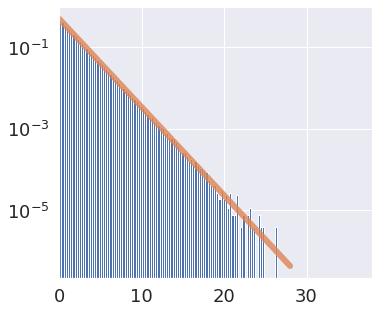

In [659]:
fig, ax = plt.subplots(1, 1)
ax.hist(R,100, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 18)
x = np.linspace(0,28,100000)
ax.plot(x,stats.expon.pdf(x,loc = 0., scale = 2),linewidth = 6,alpha = 0.8) #scale of 2 means lambda of 1/2
plt.xlim([0,38])
plt.show()

Signal-free data that follows an exponential distribtion: (hypothetical measurment value = 2 )

Having measured a signal of 2, and knowing the probability density of the background signals, I need to find out what the chances are that any signal with a value of 2 or higher is part of the background. Just by looking at the graph above we can see that if the distribution represents a continuous background signal, the higher value our new hypothetical signal is, the less likely it is that said signal orginiated from the background. 


In [660]:
hyp = 2

In [661]:
left = stats.expon.cdf(hyp,loc = 0., scale = 2)
1-left

0.36787944117144233

This calculation above tells us that, for the above distribution, the background has a 37% percent chance of generating a signal at 2 or higher. 

oddly enough, one standard deviation away from the peak of an exponential distribution is its mean!!! So to find the 'sigma' value of our hypothetical measurement we just divide the measurement value by the mean value, calculated below:

We can also check our answer by running a ppf() instead of using the generated data. these two sigma values should be very close.

In [662]:
data = R
df = DataFrame(data)

mean = df.mean()

sigma_exp = hyp/mean
print(sigma_exp)

0    0.99965
dtype: float64


In [663]:
stats.expon.ppf(0.3678794411, loc = 0., scale = 2) 

0.9173502905481233

So our sigma value for a measurement at 2 is just about 1, just slightly below the mean value for this exponential distribution. this being true, a measurment with a value of 2 is characteristic of the background distribution, which is most likely its origin. 

Other hypothetical values:

15 has a probibility of 0.05% at 7.5 sigma

0.5 has a probibility of 78%% at .25 sigma

Clearly, the trend is exponentially higher probability as our measurement value decreases. and visa versa. 

I imagine this could be the probability of finding a shell on the ground as you get further from a beach. At 0.5 miles, there is a 78% chance that you will find a shell on the ground anywhere outside or at that radius. But if you were no less than 15 miles away, there is only a .05% chance you would find a shell from the specific beach in question.


Binomial distributions

Binomial distributions are a form of discrete probability distributions that are characterized by having multiple identical trials that share a identical probability.

Below is a plotted binomial distribution with a trial size of 20 and a variance of 0.5 resulting in an almost gaussian curve.

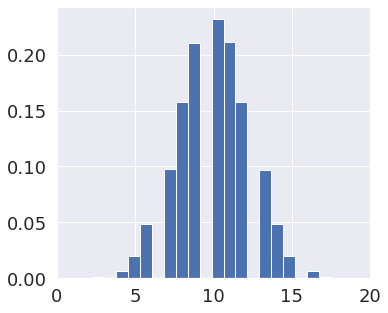

In [613]:
(n, p) = (20, 0.5)
B = binom.rvs(n, p, size=1000000)
fig, ax = plt.subplots(1, 1)
ax.hist(B,25, density=True)
#plt.yscale('log') this isnt in log because it doesnt make much difference, and non lof axis are more informative.
plt.tick_params(labelsize = 18)
plt.xlim([0,20])
plt.show()

This next plot has a much higher varience of .9 and is weighted to the right

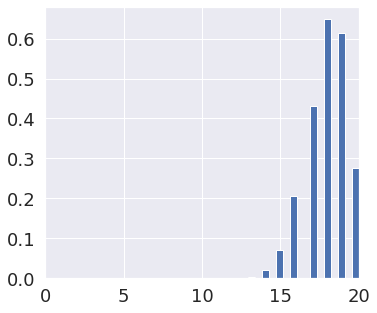

In [614]:
(n, p) = (20, 0.9)
H = binom.rvs(n, p, size=1000000)
fig, ax = plt.subplots(1, 1)
ax.hist(H,25, density=True)
#plt.yscale('log') this isnt in log because it doesnt make much difference, and non lof axis are more informative.
plt.tick_params(labelsize = 18)
plt.xlim([0,20])
plt.show()

And this next one has a much lower variance of .1 and as you can see it is weighted to the left

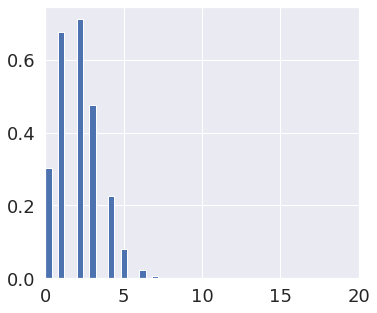

In [621]:
(n, p) = (20, 0.1)
G = binom.rvs(n, p, size=1000000)
fig, ax = plt.subplots(1, 1)
ax.hist(G,25, density=True)
#plt.yscale('log') this isnt in log because it doesnt make much difference, and non lof axis are more informative.
plt.tick_params(labelsize = 18)
plt.xlim([0,20])
plt.show()

Hypothetically, given the first binomial shown (n=20 0.5 variance), what are the chances I would measure a signal at a value 15 or higher... 

or in other terms, if I had found twenty rocks out in the forest and each day I flipped them all over, either finding bugs or no bugs living underneathe them, what are the chances that on any given day I come home with 15 or more rocks worth of bugs?

In [631]:
bin_left = binom.cdf(15, n = 20, p = 0.5)
1 - bin_left
              

0.005908966064453125

In [635]:
sigma_binomial = 2.2361 # = sqrt( n ⋅ p ⋅ ( 1 − p ) )
mew_binomial = 10 # = n⋅ p = 20 ⋅ 0.5 

abs( 15 - mew_binomial ) / sigma_binomial

2.236035955458164

After calculation it appears I only have a 0.5% chance to find 15 or more bugs on any given day... sadly. This correlates to a sigma of 2.2.

Notably, probabilites and sigmas are descrete quantities when it comes to binomial distributions (although not nessecaraly integers). This is directly caused by the discrete nature of the variables being measured. In experiment, this can simplify things, mostly because it limits the number of regions a researcher needs to explore. 
